In [489]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
import re
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
import math
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import ADASYN 
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from tqdm.notebook import tqdm

In [490]:
def oversampler_choice_train(x):
    global X_train, y_train
    if x=="ros":
        ros = RandomOverSampler()
        X_train, y_train = ros.fit_sample(X_train, y_train)
        print("Random Oversampler: ", y_train.value_counts())
    elif x=="smote":
        smote = SMOTE()
        X_train, y_train = smote.fit_sample(X_train, y_train)
        print("SMOTE: ", y_train.value_counts())
    elif x == "ada":
        ada = ADASYN(random_state=42)
        X_train, y_train = ada.fit_sample(X_train, y_train)
        print("ADASYN: ", y_train.value_counts())
    else:
        print ("Input should be ros, smote or ada")

In [548]:
def model_predictions(x):
    global X_train, X_test, y_train, y_test, model, predictions
    if x == "logistic":
        model = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
        model.fit(X_train, y_train)
        print("Logistic:")
        predictions =  model.predict(X_test)
    elif x == "knn":
        model = KNeighborsClassifier(n_neighbors=5, weights = 'distance')
        model.fit(X_train, y_train)
        print("KNN:")
        predictions = model.predict(X_test)
    elif x=="decision_tree":
        model = DecisionTreeClassifier()
        model.fit(X_train, y_train)
        print("Decision Tree:")
        predictions = model.predict(X_test)
    elif x=="random_forest":
        model = RandomForestClassifier()
        model.fit(X_train, y_train)
        print ("Random Forest:")
        predictions = model.predict(X_test)
    else:
        print ("Choose logistic, knn, decision_tree or random_forest")   
    
    print("The accuracy of the model on test set is: ", accuracy_score(y_test, predictions))
    print("Kappa: ", cohen_kappa_score(y_test, predictions))       
    print("ROC-AUC score: ", roc_auc_score(y_test, predictions)) #should be as high as possible 0-1
    print("Accuracy score: ", accuracy_score(y_test, predictions)) #percent correct 0-1
    print("F1 score: ", f1_score(y_test, predictions)) #should be as high as possible 0-1      
    print ("R squared: ", r2_score(y_test, predictions))
    print ("MSE: ", mean_squared_error(y_test, predictions))
    print ("RMSE: ", math.sqrt(mean_squared_error(y_test, predictions)))
    print ("MAE: ", mean_absolute_error(y_test, predictions))
    print ("Confusion Matrix - raw:")
    plot_confusion_matrix(model, X_test, y_test, cmap = "GnBu")
    plt.show() 
    print ("Confusion Matrix - normalised:")
    plot_confusion_matrix(model, X_test, y_test, normalize='true', cmap = "GnBu")
    plt.show() 

In [527]:
data = pd.read_csv('data_preprocessed.csv')

In [493]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.707586,-0.702022,-1.017142,-0.574677,-1.000169,-0.703636,-0.704174,-1.35584,0.697667,0.118632,-0.370037,0.438873,1.564294,No
1,-0.707586,-0.702022,-1.017142,-0.574677,0.999831,-0.703636,1.420103,0.73755,-2.327660,-1.735886,-1.224521,-1.914632,-1.385822,No
2,-0.707586,-0.702022,0.983147,-0.574677,-1.000169,-0.703636,1.420103,0.73755,-1.941845,-1.613711,-1.417469,-1.912826,-1.012657,No
3,-0.707586,-0.702022,-1.017142,-0.574677,0.999831,-0.703636,-0.704174,-1.35584,0.871545,0.162396,0.638806,0.603239,-0.048061,No
4,-0.707586,-0.702022,-1.017142,-0.574677,0.999831,-0.703636,1.420103,0.73755,0.847665,-0.087426,1.436325,1.289602,-0.238164,No


In [528]:
y = pd.DataFrame(data[data.columns[-1]])
X = data.drop([data.columns[-1]],axis=1)

In [529]:
mapping = {
        'Yes': 1,
        'No': 0,
    }
y = y[data.columns[-1]].replace(mapping)

In [496]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: 13, dtype: int64

In [497]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.707586,-0.702022,-1.017142,-0.574677,-1.000169,-0.703636,-0.704174,-1.35584,0.697667,0.118632,-0.370037,0.438873,1.564294
1,-0.707586,-0.702022,-1.017142,-0.574677,0.999831,-0.703636,1.420103,0.73755,-2.327660,-1.735886,-1.224521,-1.914632,-1.385822
2,-0.707586,-0.702022,0.983147,-0.574677,-1.000169,-0.703636,1.420103,0.73755,-1.941845,-1.613711,-1.417469,-1.912826,-1.012657
3,-0.707586,-0.702022,-1.017142,-0.574677,0.999831,-0.703636,-0.704174,-1.35584,0.871545,0.162396,0.638806,0.603239,-0.048061
4,-0.707586,-0.702022,-1.017142,-0.574677,0.999831,-0.703636,1.420103,0.73755,0.847665,-0.087426,1.436325,1.289602,-0.238164


In [530]:
#split into train/test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [499]:
print("y_test:\n",y_test.value_counts())
print("y_train:\n", y_train.value_counts())

y_test:
 0    4999
1     315
Name: 13, dtype: int64
y_train:
 0    11700
1      697
Name: 13, dtype: int64


In [549]:
oversampler_choice_train("smote")

SMOTE:  1    11700
0    11700
Name: 13, dtype: int64


Random Forest:
The accuracy of the model on test set is:  0.8678961234474972
Kappa:  0.08914823888827306
ROC-AUC score:  0.5579655613662414
Accuracy score:  0.8678961234474972
F1 score:  0.15625000000000003
R squared:  -1.3689995141885523
MSE:  0.13210387655250283
RMSE:  0.3634609697787409
MAE:  0.13210387655250283
Confusion Matrix - raw:


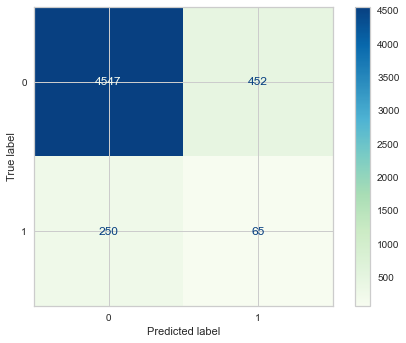

Confusion Matrix - normalised:


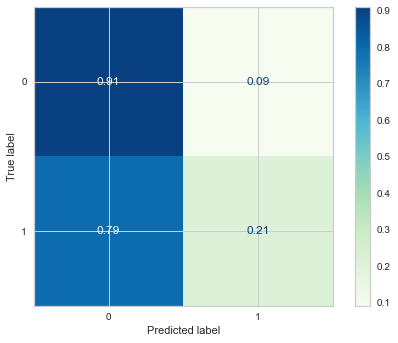

In [550]:
#choose which model to run. Logistic Regression: "logistic", K Nearest Neighbours: "knn", 
#Decision Tree: "decision_tree", Random Forest: "random_forest"

model_predictions("random_forest")

In [502]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.datasets import make_blobs
# from sklearn.ensemble import RandomForestClassifier


# X, y = make_blobs(centers=[[0, 0], [1, 1]], random_state=61526, n_samples=50)

# def plot_forest(max_depth=1):
#     plt.figure()
#     ax = plt.gca()
#     h = 0.02

#     x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
#     y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#     if max_depth != 0:
#         forest = RandomForestClassifier(n_estimators=20, max_depth=max_depth,
#                                         random_state=1).fit(X, y)
#         Z = forest.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
#         Z = Z.reshape(xx.shape)
#         ax.contourf(xx, yy, Z, alpha=.4)
#         ax.set_title("max_depth = %d" % max_depth)
#     else:
#         ax.set_title("data set")
#     ax.scatter(X[:, 0], X[:, 1], c=np.array(['b', 'r'])[y], s=60)
#     ax.set_xlim(x_min, x_max)
#     ax.set_ylim(y_min, y_max)
#     ax.set_xticks(())
#     ax.set_yticks(())


# def plot_forest_interactive():
#     from IPython.html.widgets import interactive, IntSlider
#     slider = IntSlider(min=0, max=8, step=1, value=0)
#     return interactive(plot_forest, max_depth=slider)

# plot_forest_interactive()

In [503]:
# import itertools

# list_1=["normalizer", "standard_scaler"]
# list_5=["ordinal encoding", "no ordinal encoding"]
# list_4=["ADASYN", "SMOTE", "ros"]
# list_6=["knn", ""]


# for combination in itertools.product(list_1, list_2, list_3, list_4, list_5):
#     print (combination)

In [504]:
# #Kfold validation
# models = []
# models.append(('LR', LogisticRegression()))
# models.append(('KNN', KNeighborsClassifier()))
# models.append(('CART', DecisionTreeClassifier()))
# models.append(('NB', GaussianNB()))
# models.append(('RFC', RandomForestClassifier()))


# results = []
# names = []
# scoring = 'accuracy'

# for name, model in models:
#     kfold = KFold(n_splits=10, random_state=7)
#     cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
#     results.append(cv_results)
#     names.append(name)
#     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#     print(msg)

In [510]:
pip install yellowbrick


Note: you may need to restart the kernel to use updated packages.


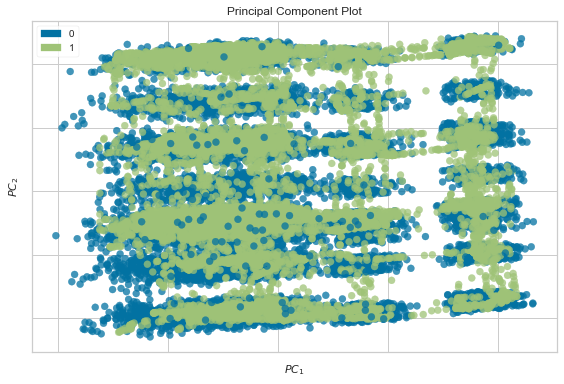

In [514]:
from yellowbrick.features.pca import PCADecomposition
from yellowbrick.draw import manual_legend
import matplotlib.pyplot as plt
def visual_pca(x_train, y_train):
    plt.figure()
    colors = np.array(['b' if yi else 'r' for yi in y_train])
    visualizer = PCADecomposition(scale=True, color=colors)
    visualizer.fit_transform(x_train, y_train)
    manual_legend(visualizer, ('real', 'forged'), ('b', 'r'))
    visualizer.poof(outpath="pca.png")   
    
    
visual_pca(X_train, y_train)    

In [519]:
from yellowbrick.features.manifold import Manifold
import matplotlib.pyplot as plt
def visual_tsne(x_train, y_train):
    plt.figure()
    y = np.array(['real' if yi else 'forged' for yi in y_train])
    visualizer = Manifold(manifold='lle', target='discrete')
    visualizer.fit_transform(x_train, y)
    visualizer.finalize()
    visualizer.poof(outpath="lle.png")
    plt.close()
    
visual_tsne(X_train, y_train)

In [520]:
from yellowbrick.features.manifold import Manifold
import matplotlib.pyplot as plt
def visual_isomap(x_train, y_train):
    plt.figure()
    y = np.array(['real' if yi else 'forged' for yi in y_train])
    visualizer = Manifold(manifold='isomap', target='discrete')
    visualizer.fit(x_train, y)
    visualizer.poof(outpath="isomap.png")
    plt.close()
    
visual_isomap(X_train, y_train)

Random Forest:
The accuracy of the model on test set is:  0.8699661272111404
Kappa:  0.09826434302738773
ROC-AUC score:  0.5635276261601527
Accuracy score:  0.8699661272111404
F1 score:  0.16444981862152358
R squared:  -1.3318784391798997
MSE:  0.1300338727888596
RMSE:  0.3606020975935382
MAE:  0.1300338727888596
Confusion Matrix - raw:


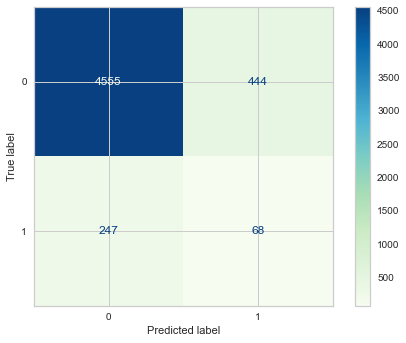

Confusion Matrix - normalised:


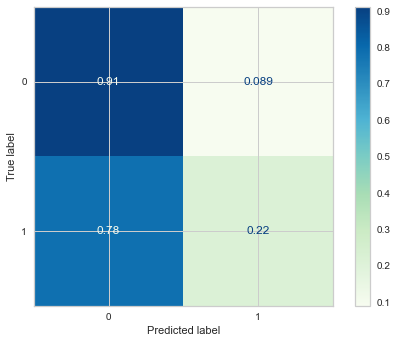

KNN:
The accuracy of the model on test set is:  0.7999623635679337
Kappa:  0.07755559946503021
ROC-AUC score:  0.575400476920781
Accuracy score:  0.7999623635679337
F1 score:  0.15968379446640316
R squared:  -2.5872457031088762
MSE:  0.20003763643206623
RMSE:  0.44725567233078917
MAE:  0.20003763643206623
Confusion Matrix - raw:


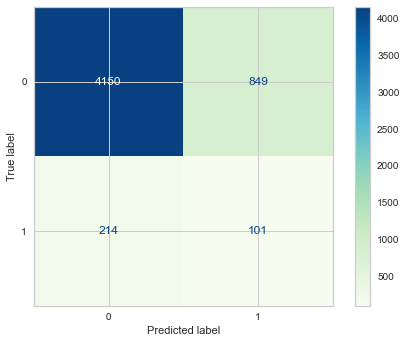

Confusion Matrix - normalised:


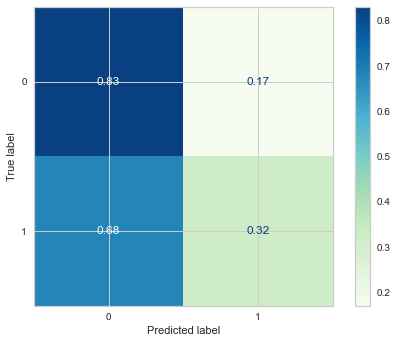

Logistic:
The accuracy of the model on test set is:  0.6859239744072262
Kappa:  0.11658588934506309
ROC-AUC score:  0.6858257365758866
Accuracy score:  0.6859239744072262
F1 score:  0.2056163731556402
R squared:  -4.63227947176737
MSE:  0.3140760255927738
RMSE:  0.5604248616833248
MAE:  0.3140760255927738
Confusion Matrix - raw:


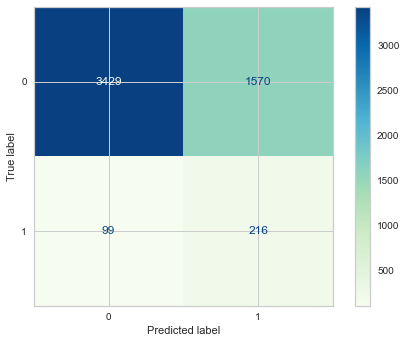

Confusion Matrix - normalised:


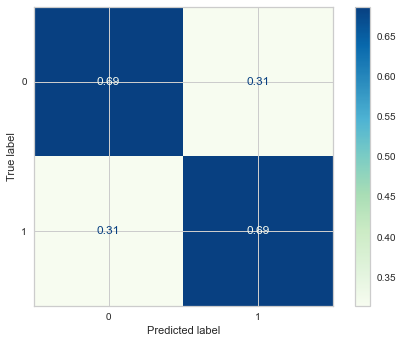

Decision Tree:
The accuracy of the model on test set is:  0.8317651486639067
Kappa:  0.06639028123161306
ROC-AUC score:  0.5536345364310957
Accuracy score:  0.8317651486639067
F1 score:  0.14367816091954022
R squared:  -2.016931005248669
MSE:  0.16823485133609334
RMSE:  0.41016441988072705
MAE:  0.16823485133609334
Confusion Matrix - raw:


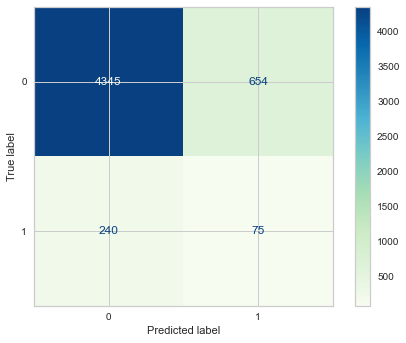

Confusion Matrix - normalised:


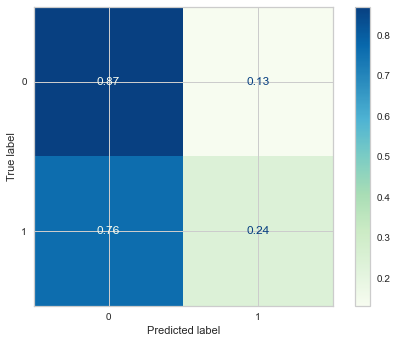

In [536]:
model_predictions("random_forest")
model_forest = model
model_predictions("knn")
model_knn  = model
model_predictions("logistic")
model_logistic = model
model_predictions("decision_tree")
model_tree = model

In [509]:



from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
def visual_ml(clf1, clf2, clf3, clf4, X, y):
    y = np.array(y, dtype = np.uint)
    pca = PCA(n_components = 2)
    X = pca.fit_transform(X)
    eclf = EnsembleVoteClassifier(clfs = [clf1, clf2, clf3, clf4], verbose = 2)
    labels = ['KNN',
          'Extra Trees',
          'SVM',
          'Random Forest',
          'ensemble']
    for clf, lab in zip([clf1, clf2, clf3, clf4, eclf], labels):
        clf.fit(X, y)
        plt.figure()
        fig = plot_decision_regions(X=X, y=y, clf=clf)
        plt.title(lab)
        plt.show()
        plt.close()

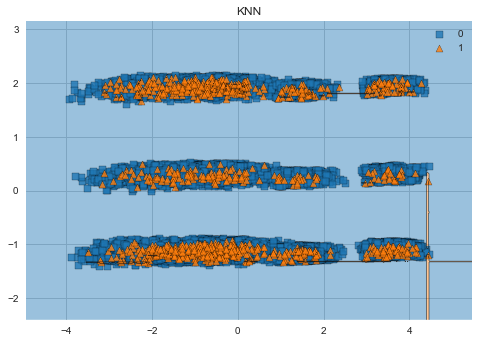

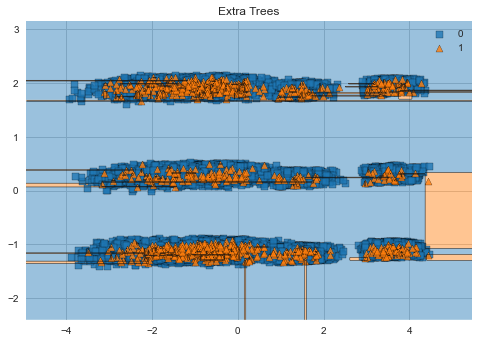

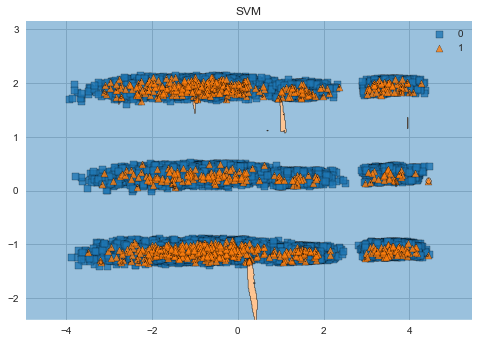

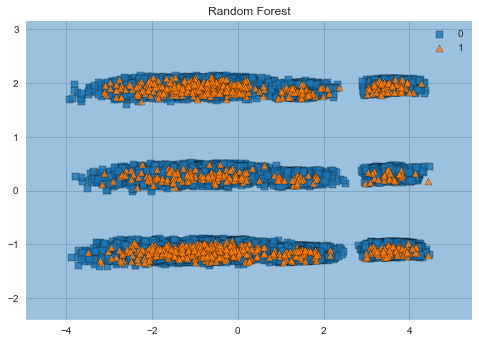

Fitting 4 classifiers...
Fitting clf1: randomforestclassifier (1/4)
RandomForestClassifier()
Fitting clf2: decisiontreeclassifier (2/4)
DecisionTreeClassifier()
Fitting clf3: kneighborsclassifier (3/4)
KNeighborsClassifier(weights='distance')
Fitting clf4: logisticregression (4/4)
LogisticRegression(multi_class='multinomial', random_state=0)


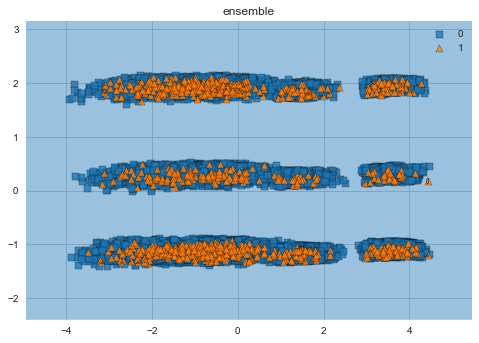

In [537]:
visual_ml(model_forest, model_tree, model_knn, model_logistic, X, y)

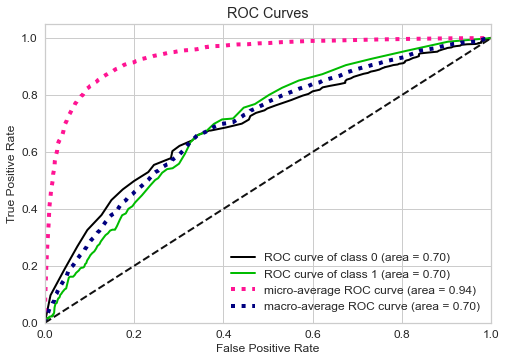

In [561]:
import scikitplot as skplt
import matplotlib.pyplot as plt


y_true = y_test
y_probas = model.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()

In [543]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.
